<a href="https://colab.research.google.com/github/oq-Yuki-po/TensorFlowTutorial/blob/develop/%E3%81%AF%E3%81%98%E3%82%81%E3%81%A6%E3%81%AE%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%EF%BC%9A%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C%E3%81%AE%E5%88%9D%E6%AD%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考URL：https://www.tensorflow.org/tutorials/keras/classification?hl=ja

## 目標
以下のことを行う
- 画像を分類するニューラルネットワークを構築する
- ニューラルネットワークを訓練する
- モデルの性能を評価する

## 準備

### パッケージの用意

In [1]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tensorflowのver確認
print(tf.__version__)

2.3.0


### データセットを用意
今回はFashion-MNISTを使用する  

10カテゴリーの白黒画像70,000枚が含まれいる  
それぞれは下図のような1枚に付き1種類の衣料品が写っている低解像度（28×28ピクセル）の画像

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

画像は28×28のNumPy配列から構成されている  
それぞれのピクセルの値は0から255の間の整数  
ラベル（label）は、0から9までの整数の配列  
それぞれの数字が下表のように、衣料品のクラス（class）に対応  

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


画像はそれぞれ単一のラベルに分類される  
データセットには上記のクラス名が含まれていないため、  
後で画像を出力するときのためにクラス名を保存しておく

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### データの観察

In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


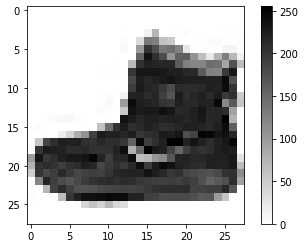

In [6]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

### データの前処理

画像データの値を0から1までの範囲にスケール

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### データの確認

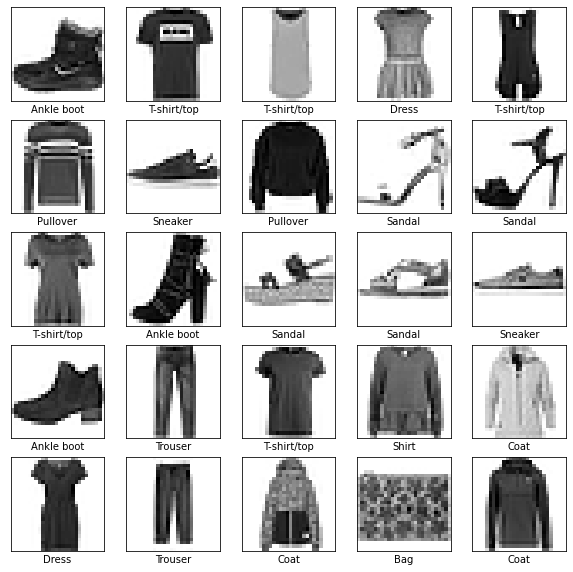

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## モデルの構築・学習

### モデルの構築

1.   28✖️28の２次元データを１次元に平滑（へいかつ）化
    > tf.keras.layers.Flatten  
    > input_shape=(28, 28)で入力されるデータの形を指定している
2.   隠れ層の定義
    > tf.keras.layers.Dense  
    > 128はユニットの数（ニューロンの数）
    > activation='relu'は活性化関数ReLUを指定している  
    > 他の活性化関数：https://www.tensorflow.org/api_docs/python/tf/keras/activations?hl=ja
3.   全結合層の定義
    > 最終的に10個クラスに分類するので10を指定する  
    > softmaxを活性化関数として使用しているので10個のノードは  
    > 今見ている画像が10個のクラスのひとつひとつに属する確率を出力する

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### モデルのコンパイル

学習のためのモデルを定義している

- optimizer：最適化アルゴリズム
    - 今回は`Adam`を指定
    - その他の最適化アルゴリズム：https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- loss：損失関数
    - 今回は`交差エントロピー`を指定
- metrics：学習及びテスト中に定量化される項目
    - 今回は`accuracy（正確性）`を指定

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### モデルの訓練

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2937 - accuracy: 0.8921


## 評価

### モデルを評価

テストデータを使用してモデルを評価する

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3599 - accuracy: 0.8721

Test accuracy: 0.8720999956130981


### 予測

テストデータを学習したモデルで予測する

In [13]:
predictions = model.predict(test_images)

最初の画像の分類結果  
確率として出力されている


In [14]:
predictions[0]

array([1.7550123e-05, 3.2610970e-07, 2.5051352e-06, 1.5735810e-06,
       5.7500472e-07, 4.6924692e-02, 3.3702756e-06, 1.4416003e-01,
       2.3210447e-04, 8.0865723e-01], dtype=float32)

In [25]:
# `np.argmax`で配列の中から最大の値（画像の分類されたラベルの番号）を取得  
print(f'predicted label : {np.argmax(predictions[0])}')
# 正解データを確認
print(f'true label : {test_labels[0]}')

predicted label : 9
true label : 9


In [17]:
def plot_image(i, predictions_array, true_label, img):
    """
    画像を予測確率と共に表示
    """
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    """
    予測結果の棒グラフを作成
    """
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

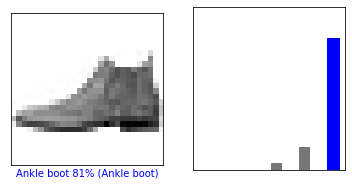

In [18]:
# テストデータの最初の画像で表示
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

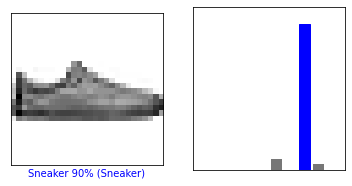

In [21]:
# テストデータの13番目の画像で表示
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

テストデータの15枚で描画を行う

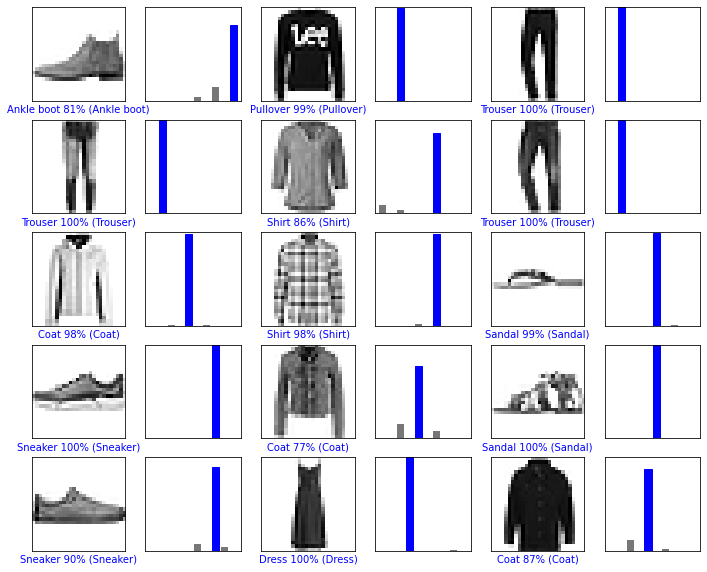

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

テストデータから画像を１枚取り出して予測を行う

In [26]:
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras モデルは、サンプルの中のバッチ（batch）あるいは「集まり」について予測を行うように作られている。  
そのため、1枚の画像を使う場合でも、リスト化する必要がある。

In [27]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.7550123e-05 3.2610910e-07 2.5051352e-06 1.5735810e-06 5.7500580e-07
  4.6924725e-02 3.3702693e-06 1.4416003e-01 2.3210513e-04 8.0865723e-01]]


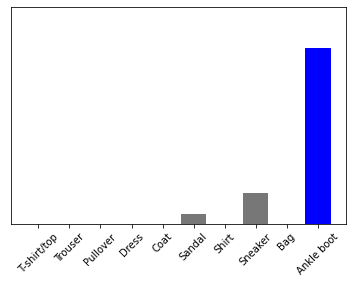

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

9